<a href="https://colab.research.google.com/github/pierce3215/finances/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet
import plotly.express as px
from pandas import read_csv

In [32]:
ticker = input("ENTER THE STOCK WHOSE PREDICTION YOU WANT : ")
df = yf.download(ticker, start='2017-01-01' , end='2023-10-06')
print(df.tail())

ENTER THE STOCK WHOSE PREDICTION YOU WANT : SPY
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-29  431.670013  431.850006  425.910004  427.480011  427.480011   
2023-10-02  426.619995  428.600006  424.459991  427.309998  427.309998   
2023-10-03  425.059998  427.369995  420.179993  421.589996  421.589996   
2023-10-04  422.070007  425.429993  420.559998  424.660004  424.660004   
2023-10-05  424.359985  425.369995  421.170013  424.500000  424.500000   

               Volume  
Date                   
2023-09-29  115078500  
2023-10-02   83798600  
2023-10-03  103760600  
2023-10-04   87453000  
2023-10-05   70103300  


In [33]:
df = df.reset_index()

In [34]:
fig = px.line(df, x='Date', y='Close')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [35]:
df[['ds','y']] = df[['Date','Close']]
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629684,91366500,2017-01-03,225.240005
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823257,78744400,2017-01-04,226.580002
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000,2017-01-05,226.399994
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900,2017-01-06,227.210007
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716385,46939700,2017-01-09,226.460007
...,...,...,...,...,...,...,...,...,...
1696,2023-09-29,431.670013,431.850006,425.910004,427.480011,427.480011,115078500,2023-09-29,427.480011
1697,2023-10-02,426.619995,428.600006,424.459991,427.309998,427.309998,83798600,2023-10-02,427.309998
1698,2023-10-03,425.059998,427.369995,420.179993,421.589996,421.589996,103760600,2023-10-03,421.589996
1699,2023-10-04,422.070007,425.429993,420.559998,424.660004,424.660004,87453000,2023-10-04,424.660004


In [36]:
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (1361, 9)
testing data size : (340, 9)


In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
model = Prophet(daily_seasonality=True)
model.fit(train_data)
prediction = model.predict(pd.DataFrame({'ds':test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/83bbwoo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/7nr6gb4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70155', 'data', 'file=/tmp/tmposc6gyuu/83bbwoo1.json', 'init=/tmp/tmposc6gyuu/7nr6gb4n.json', 'output', 'file=/tmp/tmposc6gyuu/prophet_modelstjsukkz/prophet_model-20231006174237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


8.253058758903952

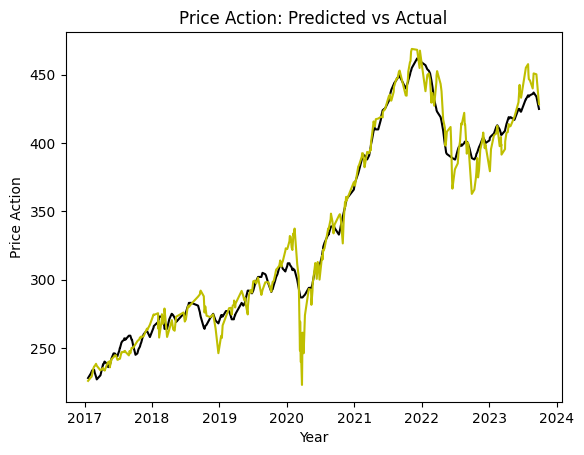

In [39]:
plt.plot(test_data['ds'], y_predicted, 'k')
plt.plot(test_data['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Price Action")
plt.title("Price Action: Predicted vs Actual")
plt.show()

In [40]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/odk9jgci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/xz800_iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52820', 'data', 'file=/tmp/tmposc6gyuu/odk9jgci.json', 'init=/tmp/tmposc6gyuu/xz800_iv.json', 'output', 'file=/tmp/tmposc6gyuu/prophet_modelqvkrocwh/prophet_model-20231006174252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


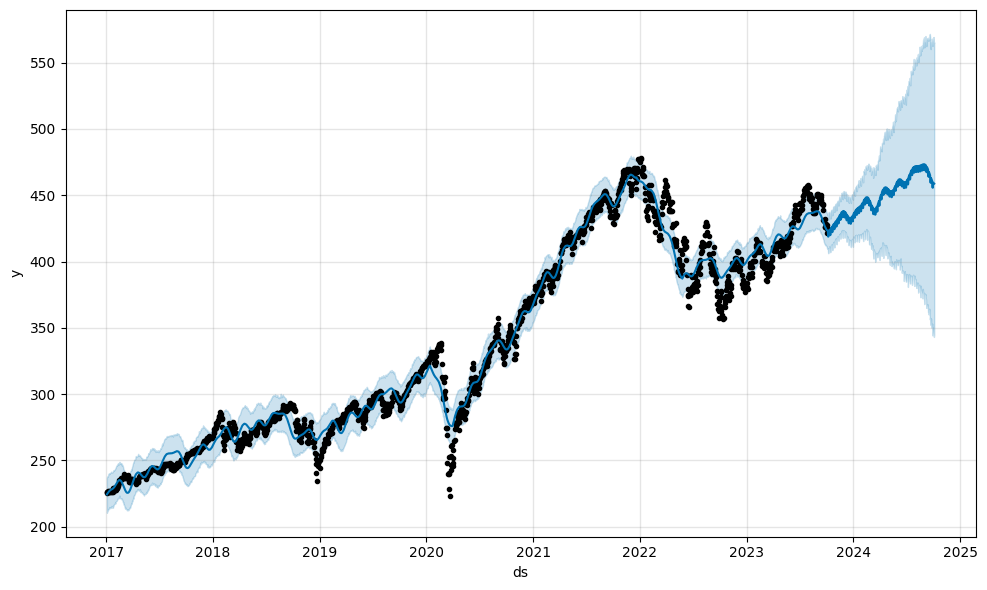

In [41]:
model.plot(forecast)
plt.show()

In [42]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds        yhat  yhat_lower  yhat_upper
2061 2024-09-30  459.559296  346.580950  568.653276
2062 2024-10-01  459.355752  348.028969  565.364568
2063 2024-10-02  459.099647  350.692145  569.267815
2064 2024-10-03  458.848242  343.119571  564.795363
2065 2024-10-04  458.677307  345.090614  565.295750


In [43]:
fbp = Prophet(daily_seasonality = True)
fbp.fit(df)
fut = fbp.make_future_dataframe(periods=365)
forecast = fbp.predict(fut)

DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/llj4v7u6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmposc6gyuu/pzsntnt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25158', 'data', 'file=/tmp/tmposc6gyuu/llj4v7u6.json', 'init=/tmp/tmposc6gyuu/pzsntnt4.json', 'output', 'file=/tmp/tmposc6gyuu/prophet_modelbxejk5i9/prophet_model-20231006174309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(fbp, forecast)

In [50]:
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629684,91366500,2017-01-03,225.240005
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823257,78744400,2017-01-04,226.580002
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662933,78379000,2017-01-05,226.399994
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384445,71559900,2017-01-06,227.210007
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716385,46939700,2017-01-09,226.460007


In [52]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

In [54]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 26.705656528465624


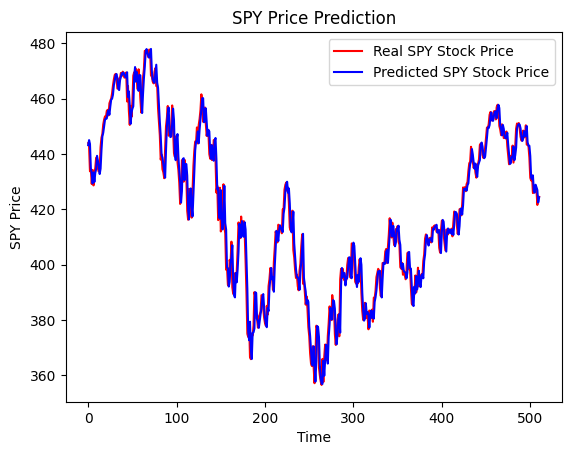

In [57]:
plt.plot(test_data, color='Red', label='Real SPY Stock Price')
plt.plot(model_predictions, color='Blue', label='Predicted SPY Stock Price')
plt.title('SPY Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Price')
plt.legend()
plt.show()